<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JuanCarlos_GarciaRendonMartinez/blob/main/Semana_7_Regresiones_y_K_means__A01793708.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
###Prof. Titular: María de la Paz Rico Fernández
###Prof. Tutor: Bernardo Charles Canales

### **Actividad Semanal -- 7 Regresiones y K meansn**

**Alumno**: Juan Carlos García Rendón Martinez           
**Matrícula**: A01793708
**Fecha**: 11/05/2022

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [79]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [80]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [ ]:
np.random.rand(100, 1)

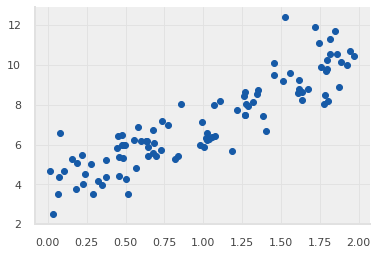

In [82]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [ ]:
import pandas as pd
pd.DataFrame(y)

In [84]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

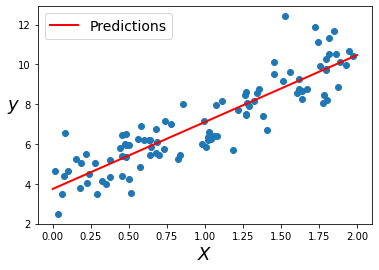

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

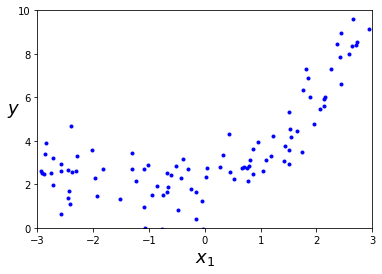

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

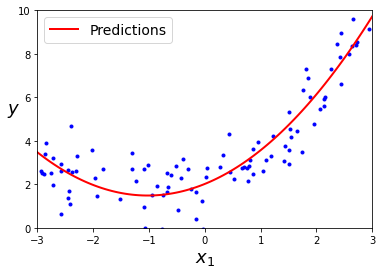

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [24]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [25]:
len(X)

1000

In [26]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

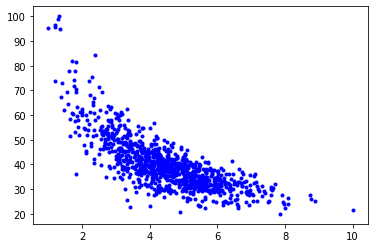

In [27]:
plt.plot(X,y,'b.')

In [28]:
#Dividimos los datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 800
Tamaño de X_train: (800, 1)
**************************************************
Mumero total de registros en el test dataset: 200
Tamaño del X_test: (200, 1)


In [29]:
#lineal
from sklearn.linear_model import LinearRegression               #Llamamos la libreria

linear_reg = LinearRegression(fit_intercept=True)               #Definimos el modelo
linear_reg.fit(X_train, y_train)                                #Ajustamos el modelo

LinearRegression()

In [30]:
linear_reg.coef_, linear_reg.intercept_             #Recuperamos el coeficiente e interceptada del modelo
print(f"La ecuación del modelo es: {np.array2string(linear_reg.coef_[0], precision=4)}x + {linear_reg.intercept_:.4f}")


La ecuación del modelo es: -6.2185x + 67.8901


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


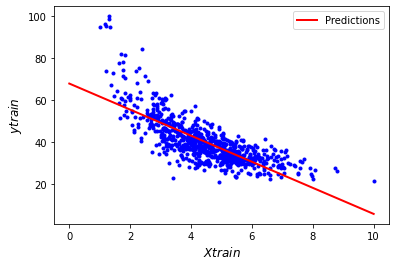

In [31]:
# Visualización Lineal
X_fit = np.linspace(0, 10, 200)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.plot(X_train, y_train, "b.")
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X train$", fontsize=12)
plt.ylabel("$y train$", rotation=90, fontsize=12)
plt.legend(loc="upper right", fontsize=10);

In [32]:
#Calculamos los errores en base a conjunto de prueba
y_pred = linear_reg.predict(X_test)
lin_errors = np.abs(y_test - y_pred)
lin_errors

521    1.156146
737    1.793752
740    0.426854
660    1.624349
411    1.208127
         ...   
408    5.946441
332    8.173375
208    6.936558
613    1.115701
78     1.811304
Name: Manufacturing Cost, Length: 200, dtype: float64

In [33]:
#Calculamos la R2, la cual podemos obtener del objeto del regresor
lin_r2 = linear_reg.score(X_test,y_test)
print(f"La R2 lineal es: {lin_r2:.4f}")

La R2 lineal es: 0.5696


In [34]:
#polinomial - añadimos el cuadrado de la variable existente
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [35]:
poli_reg = LinearRegression(fit_intercept=True)
poli_reg.fit(X_poly, y_train)
print(f"La ecuación del modelo es: {np.array2string(poli_reg.coef_[0], precision=4)}x + {np.array2string(poli_reg.coef_[1], precision=4)}x^2 + {poli_reg.intercept_:.4f}")

La ecuación del modelo es: -17.8164x + 1.2718x^2 + 92.0358


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


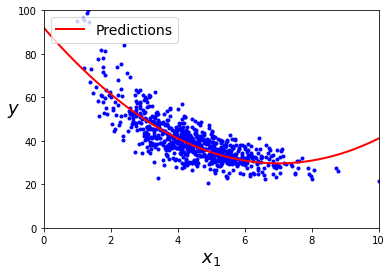

In [36]:
#Visualización polinomica
X_new=np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = poli_reg.predict(X_new_poly)
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100]);

In [37]:
#Calculamos los errores en base a conjunto de prueba
X_test_poly = poly_features.transform(X_test)
y_pred = poli_reg.predict(X_test_poly)
poli_errors = np.abs(y_test - y_pred)
poli_errors

521    1.136586
737    0.167644
740    1.184405
660    0.388317
411    3.321965
         ...   
408    3.842855
332    6.389197
208    7.409390
613    3.292142
78     0.666825
Name: Manufacturing Cost, Length: 200, dtype: float64

In [38]:
#Calculamos la R2, la cual podemos obtener del objeto del regresor
poly_r2 = poli_reg.score(X_test_poly,y_test)
print(f"La R2 polinomial es: {poly_r2:.4f}")

La R2 polinomial es: 0.5937


La ecuación del modelo es: -15.4434x + 1.0234x^2 + 86.8399
Los errores son: 
521    0.682180
737    0.574267
740    0.779821
660    0.066469
411    2.938700
         ...   
408    4.222984
332    6.680481
208    7.434853
613    2.823219
78     0.014698
Name: Manufacturing Cost, Length: 200, dtype: float64
La R2 Ridge es: 0.6116


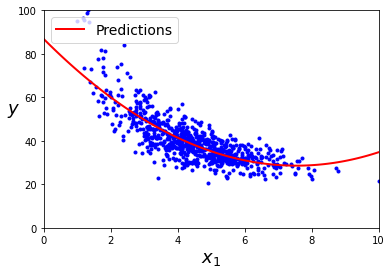

In [39]:
#Regresión con Ridge
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=10.0)
ridge_model.fit(X_poly, y_train)

print(f"La ecuación del modelo es: {np.array2string(ridge_model.coef_[0], precision=4)}x + {np.array2string(ridge_model.coef_[1], precision=4)}x^2 + {ridge_model.intercept_:.4f}")

#Visualización Ridge
y_new = ridge_model.predict(X_new_poly)
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100])
plt.show;

y_pred = ridge_model.predict(X_test_poly)
ridge_errors = np.abs(y_test - y_pred)
print(f"Los errores son: \n{ridge_errors}")

ridge_r2 = ridge_model.score(X_test_poly,y_test)
print(f"La R2 Ridge es: {ridge_r2:.4f}")


La ecuación del modelo es: -12.3964x + 0.702x^2 + 80.2194
Los errores son: 
521    0.095737
737    1.081542
740    0.275364
660    0.641805
411    2.436664
         ...   
408    4.721201
332    7.069337
208    7.442986
613    2.225836
78     0.854746
Name: Manufacturing Cost, Length: 200, dtype: float64
La R2 lasso es: 0.6202


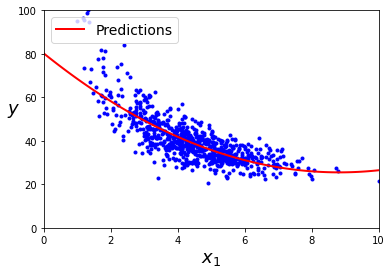

In [40]:
#Regresion con Lasso
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.4)
lasso_model.fit(X_poly, y_train)

print(f"La ecuación del modelo es: {np.array2string(lasso_model.coef_[0], precision=4)}x + {np.array2string(lasso_model.coef_[1], precision=4)}x^2 + {lasso_model.intercept_:.4f}")

#Visualización lasso
y_new = lasso_model.predict(X_new_poly)
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100])
plt.show;

y_pred = lasso_model.predict(X_test_poly)
lasso_errors = np.abs(y_test - y_pred)
print(f"Los errores son: \n{lasso_errors}")

lasso_r2 = lasso_model.score(X_test_poly,y_test)
print(f"La R2 lasso es: {lasso_r2:.4f}")


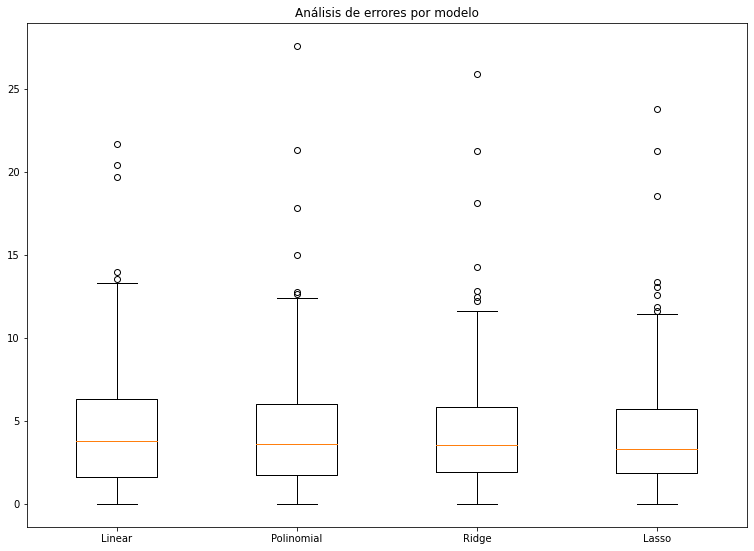

In [41]:
#Grafica MAE de los 4 modelos

fig = plt.figure(figsize =(10, 7))
 
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['Linear', 'Polinomial',
                    'Ridge', 'Lasso'])
plt.title("Análisis de errores por modelo")
bp = ax.boxplot([lin_errors, poli_errors, ridge_errors, lasso_errors])
plt.show()

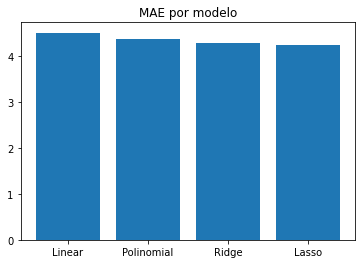

In [42]:
#Graficas de MAE
plt.bar(['Linear', 'Polinomial','Ridge', 'Lasso'],
    [lin_errors.mean(), poli_errors.mean(), ridge_errors.mean(), lasso_errors.mean()], 
    )
plt.title("MAE por modelo")
plt.show()

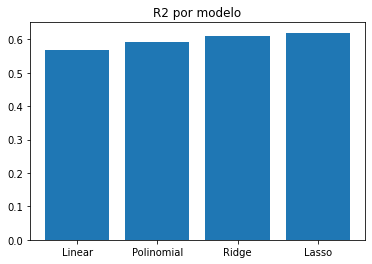

In [43]:
#Graficas de R2
plt.bar(['Linear', 'Polinomial','Ridge', 'Lasso'],
    [lin_r2, poly_r2, ridge_r2, lasso_r2], 
    )
plt.title("R2 por modelo")
plt.show()

# Conclusiones Ejercicio 1

**Explica tus resultados, ¿que porcentajes de entrenamiento y evaluación?**

Para finalizar el ejercicio y tras realizar los modelos con particiones del 80% entrenamiento y 20% pruebas.

**Qué método conviene más a la empresa, ¿por que?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**

Concluyo que el modelo que más conviene a la empresa es el modelo de generado por Regresión Lineal con Regularización de Lasso, esto ya que de los 4 fue el que mantuvo un menor error (MAE = 4.23) y mayor R2 (62.02%) tras evaluar en el conjunto de pruebas. Es decir para información que no había visto el modelo tuvo un mejor comportamiento.

Los resultados no son muy buenos, posiblemente aumentando el grado de los polinomias y experimentando con los hiperparámetros podríamos encontrar una mejor solución al problema.

In [44]:
#Perdón por no usar estas, las vi hasta el final que ya tenia lo demas :'(
#from sklearn import metrics
#from sklearn.metrics import r2_score

#print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
#print('r2_score',r2_score(y, y_pred))

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [47]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [48]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


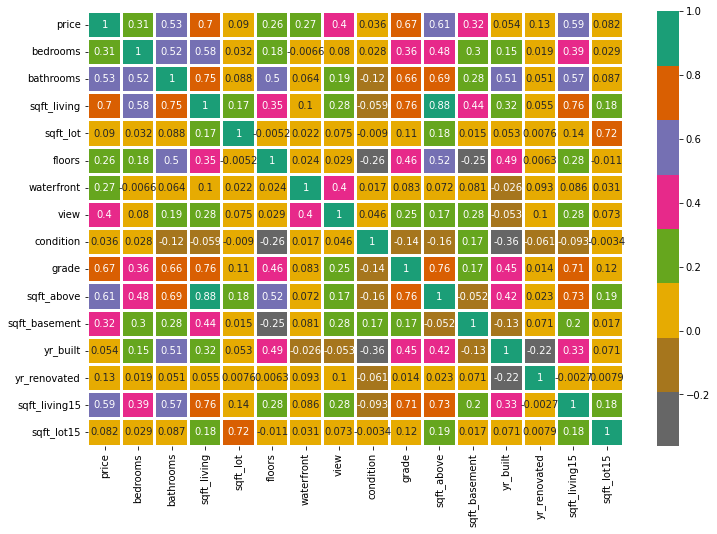

In [49]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [50]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [52]:
#Modelo Lineal
modelo_lin = LinearRegression()
modelo_lin.fit(X_train, y_train)
print(f"Los coeficientes de la ecuación son: {modelo_lin.coef_.tolist()} + {modelo_lin.intercept_.tolist()}")

y_pred_lin = modelo_lin.predict(X_test)
lin_errors = np.abs(y_test - y_pred_lin)
print(f"Los errores son: \n{lin_errors}")

lin_r2 = modelo_lin.score(X_test,y_test)
print(f"La R2 lin es: {lin_r2:.4f}")


Los coeficientes de la ecuación son: [[-38200.80483396449, 41466.13802863147, 107.99258400093822, 0.0171356997161638, 31691.691313553605, 552691.0233181857, 41249.32275203692, 21222.144256109055, 119493.21585367358, 47.77502707057647, 60.21755653483342, -3550.9021573131968, 13.260221498272529, 29.00592838751345, -0.5481326027838804]] + [6151359.262740902]
Los errores son: 
               price
3834   147279.469284
1348   112952.654035
20366  171240.639828
16617   63586.864777
20925     613.377067
...              ...
13586   15434.533006
21221    4463.908655
4016   120204.746030
5399    58262.212731
16847  184346.830273

[2162 rows x 1 columns]
La R2 lin es: 0.6580


In [53]:
#Modelo polinomial
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)

modelo_poli = LinearRegression()
modelo_poli.fit(X_poly_train, y_train)
print(f"Los coeficientes de la ecuación son: {modelo_poli.coef_.tolist()} + {modelo_poli.intercept_.tolist()}")

X_poly_test = poly_features.fit_transform(X_test)
y_pred_poli = modelo_poli.predict(X_poly_test)
poli_errors = np.abs(y_test - y_pred_poli)
print(f"Los errores son: \n{poli_errors}")

poli_r2 = modelo_poli.score(X_poly_test,y_test)
print(f"La R2 poli es: {poli_r2:.4f}")

Los coeficientes de la ecuación son: [[933912.8339811402, -1093307.2988890775, -456.44993232234583, -27.868628841106222, -2074072.3849893238, -3954318.699668158, -288638.0258699706, 558697.5702310547, 1098645.1037843083, -219.75841511336466, -382.0342717188405, -85963.09077123865, -2953.515948116647, 3999.657097775203, -34.01063159901658, 957.5416964104098, 7499.581904143857, -13.796946593364062, -0.018492669492754743, 8576.995692417637, -11496.58932158693, -306.5888999158299, -5246.2883559460415, -5367.880649994306, -1.2075766861609267, -14.606818153087893, -467.0994514251412, -9.131915185241255, 17.280064173510084, 0.21550019812278265, -9634.29892181688, 15.387917161093512, -0.13584236899568225, -25906.729342049442, 43370.723805562746, 3829.424593723277, -1075.9292703200167, 22297.168925980604, 14.429232457068736, 1.3392836056501096, 503.401980309744, -17.07988052607375, -17.289592252652824, -0.055678524828408626, 1.5618589002406225, -4.349727583350614, 4.832994564286139, 160.3031926

In [54]:
#Modelo Ridge
modelo_ridge = Ridge(alpha=300)
modelo_ridge.fit(X_poly_train, y_train)
print(f"Los coeficientes de la ecuación son: {modelo_ridge.coef_.tolist()} + {modelo_ridge.intercept_.tolist()}")


y_pred_ridge = modelo_ridge.predict(X_poly_test)
ridge_errors = np.abs(y_test - y_pred_ridge)
print(f"Los errores son: \n{ridge_errors}")

ridge_r2 = modelo_ridge.score(X_poly_test,y_test)
print(f"La R2 ridge es: {ridge_r2:.4f}")

Los coeficientes de la ecuación son: [[3683.933942559983, -1549.0172517559204, -261.4142880692441, -29.1440710381075, -1457.3312720543076, -283.17021097324823, -1767.2351309784624, 2858.247762706801, 2304.291340195594, -379.86173377167347, 118.0516287558761, -62723.43102100066, -2989.6714287821974, 4226.073742848511, -36.86407924319465, 921.2731604881155, -547.7539288077795, -10.509245540093756, -0.016734460804188632, 3662.3379157454433, -937.5684519094949, -850.280759382785, -291.98744829466415, -5006.57739588813, 0.0764180338979521, -11.256101578539282, 5.961922572241921, -0.6749280989031744, 13.738670947934342, 0.17906196661350016, -2498.8282972992524, 14.99172735094653, -0.14035461177084602, -8863.777409007227, 2293.9038456168946, 6217.206516456887, -11162.029279086548, 11924.305985082725, 13.234779826249374, 2.159246696563106, -16.68546102385419, -27.84080044968048, -6.602683814272212, -0.016474107907807022, 0.2610457595584693, 0.19254662914294607, 1.0105731295846758, 141.15663257

In [55]:
#Modelo lasso
modelo_lasso = Lasso(alpha=50, max_iter=10000)
modelo_lasso.fit(X_train, y_train)
print(f"Los coeficientes de la ecuación son: {modelo_lasso.coef_.tolist()} + {modelo_lasso.intercept_.tolist()}")


y_pred_lasso = modelo_lasso.predict(X_test)
lasso_errors = np.abs(y_test - y_pred_lasso[:, np.newaxis])
print(f"Los errores son: \n{lasso_errors}")

lasso_r2 = modelo_lasso.score(X_test,y_test)
print(f"La R2 lasso es: {lasso_r2:.4f}")

#El modelo no convergio, requiere regularización

Los coeficientes de la ecuación son: [-38137.28884525626, 41252.07564775199, 291.82310682307156, 0.016759823643050717, 31464.18135732302, 545195.247101541, 41531.45534178466, 21084.44128997935, 119424.28755820656, -135.82195217839023, -123.51835570986587, -3548.2968448439096, 13.391445173001607, 28.975998244702385, -0.5483061949923538] + [6147401.820706067]
Los errores son: 
               price
3834   147037.673584
1348   113005.256634
20366  171114.317351
16617   63869.854687
20925     665.841442
...              ...
13586   15794.369328
21221    4347.871958
4016   120454.508126
5399    58274.919950
16847  184235.211216

[2162 rows x 1 columns]
La R2 lasso es: 0.6578


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.060e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


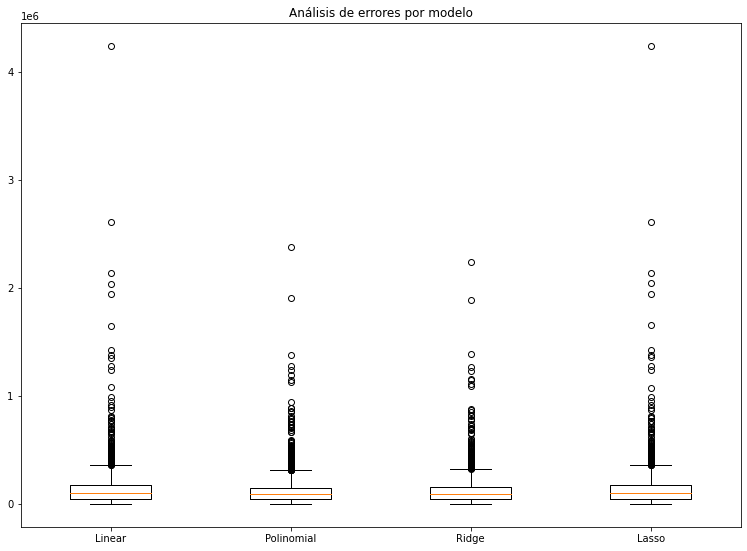

In [56]:
#Grafica MAE de los 4 modelos

fig = plt.figure(figsize =(10, 7))
 
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['Linear', 'Polinomial',
                    'Ridge', 'Lasso'])
plt.title("Análisis de errores por modelo")
bp = ax.boxplot([lin_errors.values.flatten(), poli_errors.values.flatten(), ridge_errors.values.flatten(), lasso_errors.values.flatten()])
plt.show()

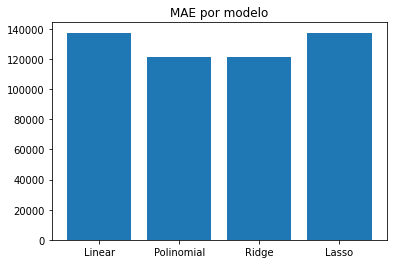

In [57]:
#Graficas de MAE
plt.bar(['Linear', 'Polinomial','Ridge', 'Lasso'],
    [lin_errors.values.mean(), poli_errors.values.mean(), ridge_errors.values.mean(), lasso_errors.values.mean()], 
    )
plt.title("MAE por modelo")
plt.show()

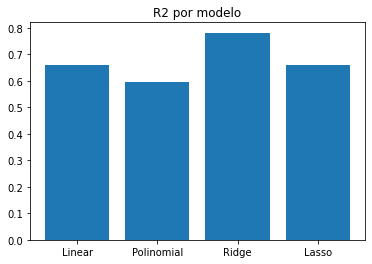

In [58]:
#Graficas de R2
plt.bar(['Linear', 'Polinomial','Ridge', 'Lasso'],
    [lin_r2, poly_r2, ridge_r2, lasso_r2], 
    )
plt.title("R2 por modelo")
plt.show()

In [59]:
ridge_r2

0.7811495804985671

# Conclusiones Ejercicio 2

**Explica tus resultados, ¿que porcentajes de entrenamiento y evaluación?**

Para finalizar el ejercicio y tras realizar los modelos con particiones del 90% entrenamiento y 10% pruebas.

**¿que método se aproxima mejor, ¿por que?,  ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**

 Concluyo que el modelo que más conviene a la empresa es el modelo de generado por Regresión Lineal con Regularización de Ridge, esto ya que de los 4 fue el que mantuvo un menor error (MAE = 121,617) y mayor R2 (78.11%) tras evaluar en el conjunto de pruebas. Es decir para información que no había visto el modelo tuvo un mejor comportamiento.

En este caso se podría mejorar el cálculo y los resultados de los modelos aplicandoles pipelines que estandaricen los datos, también sobre la variable dependiente. Puesto que el dataset incluia variables en escalas muy diferentes y posteriormente al hacerlas cuadráticas habian diferencias muy marcadas, como en el caso de Lasso donde no se logró converger por este mismo motivo

# Ejercicio 3

Análisis de tiendas Target

In [ ]:
#Instalamos librerias necesaria
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

In [65]:
#Librerias para números y dataframes
import numpy as np
import pandas as pd

#Librerias para manejo de coordenadas
import geopandas as gpd
from shapely.geometry import Point
from geopy.geocoders import Nominatim

#Librerias para gráficos
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

#Librerias para Machine Learning
from sklearn.cluster import KMeans

#Otras librerias
from tqdm import tqdm
import qeds

#Importamos los datos y exploramos
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [66]:
#Revisamos si tienen nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


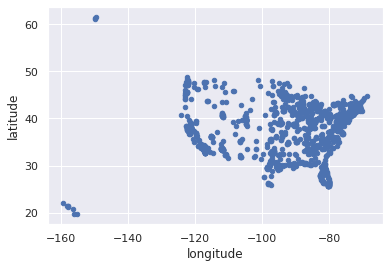

In [67]:
#Graficamos rápidamente
latlong=df[["latitude","longitude"]]

#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [68]:
#Revisamos la distribución estadística de los datos
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


In [69]:
#Agregamos un estilo
qeds.themes.mpl_style();

#Definimos nuevo dataframe solo con las coordenadas de las tiendas y lo mostramos
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [70]:
#Convertimos el DataFrame a Geoespacial
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [71]:
#Buscamos el nombre del mapa que queremos usar para graficar, este caso Estados Unidos
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


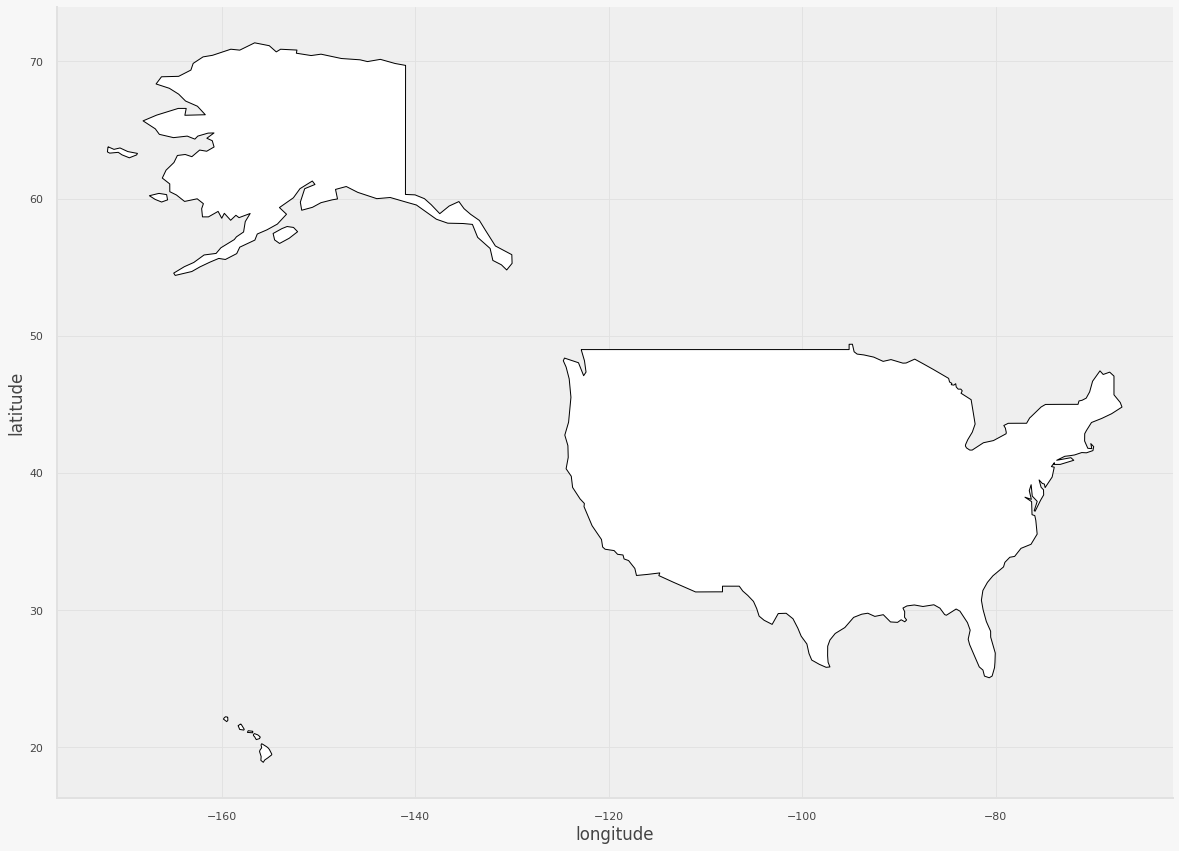

In [72]:
#Generamos primer gráfica solo con el mapa

#Definimos el tamaño del gráfico
fig, gax = plt.subplots(figsize=(20,20))

#Agregamos la capa del mapa
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

#Nombramos los ejes
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

#Quitamos los límites de las cajas
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

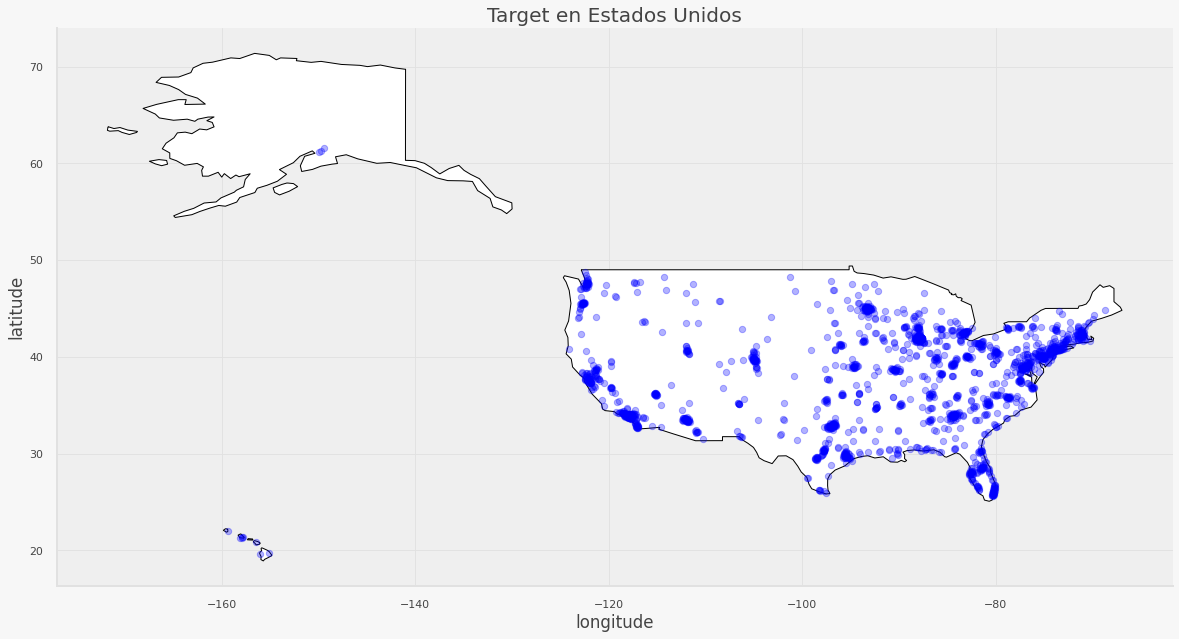

In [73]:
#Generamos segundo gráfico con el mapa y las tiendas

#Definimos el tamaño del gráfico
fig, gax = plt.subplots(figsize=(20,20))

#Agregamos la capa del mapa
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

#Agregamos la capa de las tiendas
gdf.plot(ax=gax, color='blue', alpha = 0.3, markersize=40)

#Nombramos los ejes y el gráfico
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

#Quitamos los límites de las cajas
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [74]:
#Definimos número de almacenes deseados
num_almacenes=10

#Ajustamos el modelo
kmeans = KMeans(n_clusters=num_almacenes, random_state=42).fit(latlong)

#Recuperamos la distancia de cada tienda a los almacenes
kmeans_distances = KMeans(n_clusters=num_almacenes, random_state=42).fit_transform(latlong)

In [75]:
#Para analizar la distancia máxima entre tienda y almacen asignado
df_center_distances = pd.DataFrame(kmeans_distances)           #El numpy array lo hago DataFrame
df_center_distances["Class"] = kmeans.labels_.reshape(-1,1)    #Al DF le agrego la columna con la clasificación tienda-centro

#Calculamos la distancia máxima
df_max_distance = pd.DataFrame(np.diag(df_center_distances.groupby(["Class"]).max()))   #Agrupo y con la diagonal consigo la distancia máxima de tienda-centro
df_max_distance.columns=["Max Distancia"]        #Le pongo nombre a la columna para que se vea bonita

#Calculamos la distancia promedio
df_ave_distance = pd.DataFrame(np.diag(df_center_distances.groupby(["Class"]).mean()))   #Agrupo y con la diagonal consigo la distancia máxima de tienda-centro
df_ave_distance.columns=["Prom Distancia"]        #Le pongo nombre a la columna para que se vea bonita

#Imprimimos ambas tablas
print(f"********** DISTANCIAS MAXIMAS ENTRE TIENDAS Y {num_almacenes} ALMACENES")
print(f"El promedio de distancias máximas es: {df_max_distance.values.mean():.4f}\ny se distribuyen de la siguiente forma:\n {df_max_distance}\n")
print(f"********** DISTANCIAS PROMEDIO ENTRE TIENDAS Y {num_almacenes} ALMACENES")
print(f"El promedio de distancias promedios es: {df_ave_distance.values.mean():.4f}\ny se distribuyen de la siguiente forma:\n {df_ave_distance}")

********** DISTANCIAS MAXIMAS ENTRE TIENDAS Y 10 ALMACENES
El promedio de distancias máximas es: 9.0634
y se distribuyen de la siguiente forma:
    Max Distancia
0       6.678997
1      30.677046
2       8.880668
3       4.856152
4       7.692105
5       6.058998
6      10.407559
7       6.632734
8       2.573167
9       6.176218

********** DISTANCIAS PROMEDIO ENTRE TIENDAS Y 10 ALMACENES
El promedio de distancias promedios es: 2.9102
y se distribuyen de la siguiente forma:
    Prom Distancia
0        3.542579
1        3.349093
2        2.843543
3        2.658125
4        3.044052
5        1.775038
6        4.914387
7        2.951312
8        1.305184
9        2.719061


In [76]:
#Empaquetamos las coordenadas en lista de tuplas
centers = kmeans.cluster_centers_                                   #Array con las coordenadas de los centros
Lat = list()
Long = list()
Lat = centers[:,0]
Long = centers[:,1]
tmp1 = list(zip(Lat, Long))

#Usamos Geolocator para recuperar el estado y ciudad de las tuplas
tmp2 = list()
geolocator = Nominatim(user_agent="Test")

for i in range(num_almacenes):
  location = geolocator.reverse(tmp1[i])
  address = location.raw['address']
  state = address.get('state', '')
  if state == "": 
    state = "ND" 
  city = address.get('city', '')
  if city == "": 
    city = "ND"
  tmp2.append((state, city))

#Generamos DF de almacenes y anexamos coordenadas, ciudad, estado y número de tiendas que atiende
df_centers = pd.DataFrame()                                         #Iniciamos un dataframe
df_centers["Coordinates"] = list(zip(centers[:,1], centers[:,0]))   #Empaquetamos la latitud y l0ongitud en una sola columna
df_centers["Coordinates"] = df_centers["Coordinates"].apply(Point)  #Les aplicamos la función point a cada conjunto de coordenadas
df_centers["State"] =[i[0] for i in tmp2]
df_centers["City"] =[i[1] for i in tmp2]
df_centers["Tiendas"] = df_center_distances.groupby(["Class"]).count()[0]

#Convertimos el DF en uno geoespacial para las graficas
gdf_centers = gpd.GeoDataFrame(df_centers, geometry="Coordinates")
gdf_centers

,Coordinates,State,City,Tiendas
0,POINT (-82.79528 30.23350),Florida,ND,218
1,POINT (-122.66306 46.97944),Washington,ND,73
2,POINT (-93.95728 43.22839),Iowa,ND,148
3,POINT (-78.75614 38.49744),Virginia,ND,240
4,POINT (-96.17848 31.86383),Texas,ND,206
5,POINT (-73.66385 41.30782),New York,ND,280
6,POINT (-108.67721 37.41393),Colorado,ND,130
7,POINT (-86.69027 40.71134),Indiana,ND,317
8,POINT (-157.31225 20.94543),ND,ND,8
9,POINT (-118.94133 35.43472),California,ND,219


In [77]:
#Agregamos al GDF el almacen asignado a cada tienda
gdf["Class"]= kmeans.labels_.reshape(-1,1)
gdf

,name,latitude,longitude,address,phone,website,Coordinates,Class
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423),0
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455),0
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287),0
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015),0
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606),0
...,...,...,...,...,...,...,...,...
1834,Waukesha,43.034293,-88.176840,"2401 Kossow Rd, Waukesha, WI 53186-2904",262-784-8646,https://www.target.com/sl/waukesha/82,POINT (-88.17684 43.03429),7
1835,Waukesha South,42.989604,-88.259806,"1250 W Sunset Dr, Waukesha, WI 53189-8423",262-832-1272,https://www.target.com/sl/waukesha/2546,POINT (-88.25981 42.98960),7
1836,Casper,42.846799,-106.264166,"401 SE Wyoming Blvd, Casper, WY 82609-4219",307-265-8214,https://www.target.com/sl/casper/164,POINT (-106.26417 42.84680),6
1837,Cheyenne,41.162019,-104.800048,"1708 Dell Range Blvd, Cheyenne, WY 82009-4945",307-637-8888,https://www.target.com/sl/cheyenne/224,POINT (-104.80005 41.16202),6


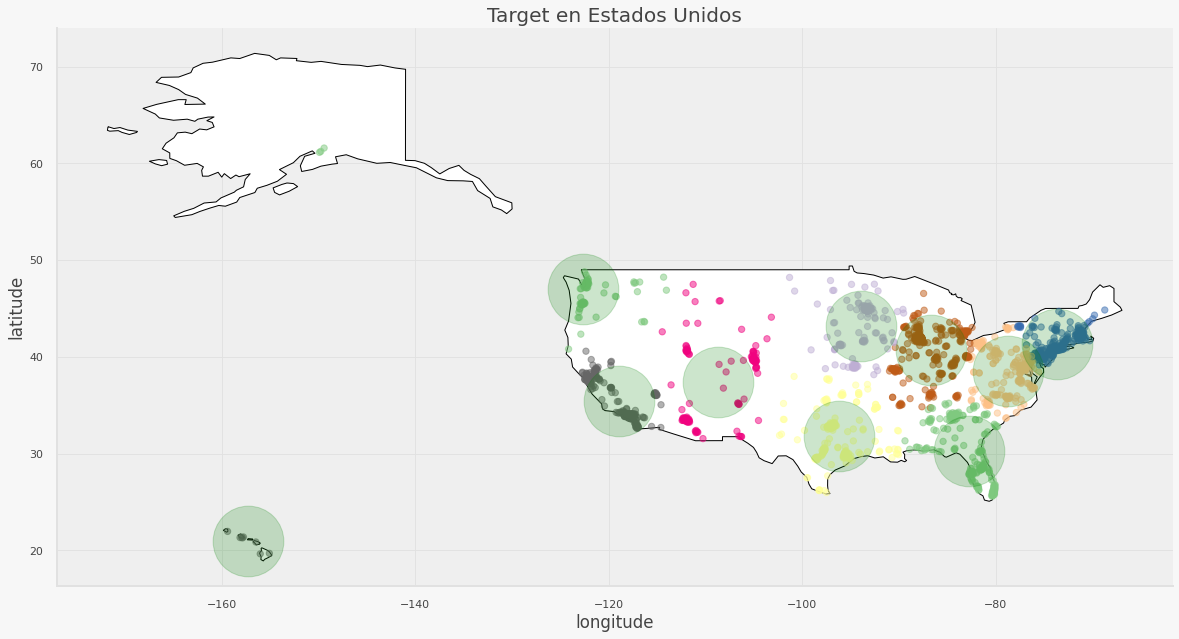

In [78]:
#Definimos el tamaño del gráfico
fig, gax = plt.subplots(figsize=(20,20))

#Agregamos la capa del mapa
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

#Agregamos la capa de las tiendas
gdf.plot(column= "Class", ax=gax, cmap="Accent",  alpha = 0.5, markersize=40)

#Agregamos la capa de los almacenes
gdf_centers.plot(ax=gax, color='green', alpha = .2, markersize=5000)

#Nombramos los ejes y el gráfico
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

#Quitamos los límites de las cajas
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

# Conclusiones Ejercicio 3

**Encuentra el numero ideal de almacenes, justifica tu respuesta:**

Tras realizar el análisis y varias predicciones concluyo que el número ideal de almacenes es 10.

**Encuentra las latitudes y longitudes de los almacenes, ¿que ciudad es?, 
¿a cuantas tiendas va surtir?**

En la tabla a continuación se muestran las latitudes y longitudes de cada uno de los almacenes, también en base a estas se calculo a qué Estado y Ciudad pertenecen. En particular los valores que indican ND se refieren a que la ubicación que se obtuvo no se encuentra dentro de una ciudad, en el caso del Estado con ND es porque sugiere una ubicación en el mar cerca de Hawaii.

Tambien se incluye el número de tiendas a las que atiende.

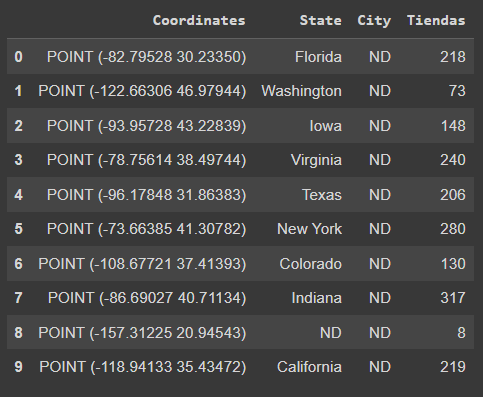

**¿Sabes a que distancia estara?**

En la tabla a continuación se brinda un análisis basado en las distancias máximas y promedio de las tiendas con su respectivo almacen. Por ejemplo el almacen 1 tiene la mayor distancia con una tienda porque es el que debe dar servicio a Alaska. Se puede apreciar que el promedio de distancias máximas es de 9.0634 grados, mientras que el promedio de las distancias promedio es de 2.91 grados.

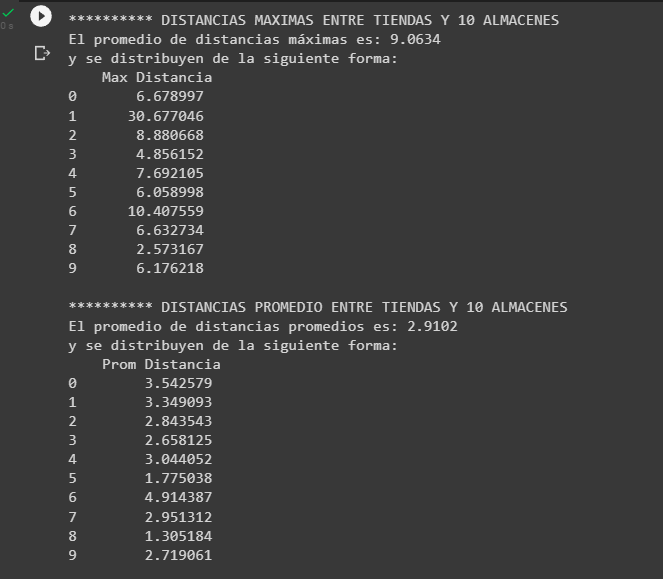

**¿Cómo elegiste el numero de almacenes?** Justifica tu respuesta tecnicamente.

Elegí el número de almacenes en base a las métricas previas, por ejemplo al modelar un total de 9 almacenes se obtenia que uno de ellos tendría que dar servicio a 450 tiendas, lo cual sonaba poco viable ya que en general se movian en un rango de 200 tiendas. También busqué que las métricas de distancia fueran menores a los 10 grados ya que todo esto se traduce en tiempos de traslado y costos. Lo mejor sería contar con personas de negocio especializadas en Logística que nos ayuden a mejorar este modelo.

**Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, despues nos auxiliamos de una librería de datos geograficos.**

**¿Qué librerías nos pueden ayudar a graficar este tipo de datos?**

PyCountry, GeoPy, Reverse Geocoder, GeoPandas por mencionar algunas.


**¿Consideras importante que se grafique en un mapa?, ¿por qué?**

En este tipo de casos sí, ya que permite ejemplificar y explicar el racional a la alta dirección sobre las ubicaciones de los almacenes y las tiendas. Y aunque no se usara para explicar el modelo, el hecho de poder visualizar nos ayuda al entendimiento del problema, un mejor preprocesamiento y modelado de los datos. Hay que valerse de todas las herramientas posibles.